# Trader Performance vs Market Sentiment Analysis
## PrimeTrade.ai — Data Science Intern Assignment

**Objective:** Analyze how Bitcoin market sentiment (Fear/Greed Index) relates to trader behavior and performance on Hyperliquid, uncovering actionable patterns for smarter trading strategies.

---
## Part A — Data Preparation

### 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("All libraries imported successfully.")

All libraries imported successfully.


### 2. Load and Inspect Datasets

In [2]:
# Load datasets
sentiment_df = pd.read_csv('data/sentiment_data.csv')
trader_df = pd.read_csv('data/trader_data.csv')

print("=" * 60)
print("SENTIMENT DATASET")
print("=" * 60)
print(f"Shape: {sentiment_df.shape[0]} rows × {sentiment_df.shape[1]} columns")
print(f"\nColumn dtypes:\n{sentiment_df.dtypes}")
print(f"\nFirst 5 rows:")
display(sentiment_df.head())
print(f"\nDescriptive statistics:")
display(sentiment_df.describe(include='all'))

print("\n" + "=" * 60)
print("TRADER DATASET")
print("=" * 60)
print(f"Shape: {trader_df.shape[0]} rows × {trader_df.shape[1]} columns")
print(f"\nColumn dtypes:\n{trader_df.dtypes}")
print(f"\nFirst 5 rows:")
display(trader_df.head())
print(f"\nDescriptive statistics:")
display(trader_df.describe(include='all'))

SENTIMENT DATASET
Shape: 2644 rows × 4 columns

Column dtypes:
timestamp         int64
value             int64
classification      str
date                str
dtype: object

First 5 rows:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Descriptive statistics:


,timestamp,value,classification,date
count,2.644000e+03,2644.000000,2644,2644
unique,NaN,NaN,5,2644
top,NaN,NaN,Fear,2018-02-01
freq,NaN,NaN,781,1
mean,1.631899e+09,46.981089,NaN,NaN
std,6.597967e+07,21.827680,NaN,NaN
min,1.517463e+09,5.000000,NaN,NaN
25%,1.574811e+09,28.000000,NaN,NaN
50%,1.631900e+09,46.000000,NaN,NaN
75%,1.688989e+09,66.000000,NaN,NaN



TRADER DATASET
Shape: 211224 rows × 16 columns

Column dtypes:
Account                 str
Coin                    str
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                    str
Timestamp IST           str
Start Position      float64
Direction               str
Closed PnL          float64
Transaction Hash        str
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object

First 5 rows:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Descriptive statistics:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
count,211224,211224,211224.000000,2.112240e+05,2.112240e+05,211224,211224,2.112240e+05,211224,211224.000000,211224,2.112240e+05,211224,211224.000000,2.112240e+05,2.112240e+05
unique,32,246,NaN,NaN,NaN,2,27977,NaN,12,NaN,101184,NaN,2,NaN,NaN,NaN
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,NaN,NaN,NaN,SELL,14-02-2025 00:31,NaN,Open Long,NaN,0x00000000000000000000000000000000000000000000...,NaN,True,NaN,NaN,NaN
freq,40184,68005,NaN,NaN,NaN,108528,441,NaN,49895,NaN,9032,NaN,128403,NaN,NaN,NaN
mean,NaN,NaN,11414.723350,4.623365e+03,5.639451e+03,NaN,NaN,-2.994625e+04,NaN,48.749001,NaN,6.965388e+10,NaN,1.163967,5.628549e+14,1.737744e+12
std,NaN,NaN,29447.654868,1.042729e+05,3.657514e+04,NaN,NaN,6.738074e+05,NaN,919.164828,NaN,1.835753e+10,NaN,6.758854,3.257565e+14,8.689920e+09
min,NaN,NaN,0.000005,8.740000e-07,0.000000e+00,NaN,NaN,-1.433463e+07,NaN,-117990.104100,NaN,1.732711e+08,NaN,-1.175712,0.000000e+00,1.680000e+12
25%,NaN,NaN,4.854700,2.940000e+00,1.937900e+02,NaN,NaN,-3.762311e+02,NaN,0.000000,NaN,5.983853e+10,NaN,0.016121,2.810000e+14,1.740000e+12
50%,NaN,NaN,18.280000,3.200000e+01,5.970450e+02,NaN,NaN,8.472793e+01,NaN,0.000000,NaN,7.442939e+10,NaN,0.089578,5.620000e+14,1.740000e+12
75%,NaN,NaN,101.580000,1.879025e+02,2.058960e+03,NaN,NaN,9.337278e+03,NaN,5.792797,NaN,8.335543e+10,NaN,0.393811,8.460000e+14,1.740000e+12


### 3. Data Cleaning — Missing Values and Duplicates

In [3]:
# --- Sentiment Dataset ---
print("SENTIMENT DATASET — Missing Values:")
print(sentiment_df.isnull().sum())
print(f"\nDuplicates: {sentiment_df.duplicated().sum()}")

# --- Trader Dataset ---
print("\nTRADER DATASET — Missing Values:")
print(trader_df.isnull().sum())
print(f"\nDuplicates: {trader_df.duplicated().sum()}")

# Drop exact duplicates if any
sent_before = len(sentiment_df)
sentiment_df.drop_duplicates(inplace=True)
print(f"\nSentiment: {sent_before} → {len(sentiment_df)} rows (removed {sent_before - len(sentiment_df)} duplicates)")

trader_before = len(trader_df)
trader_df.drop_duplicates(inplace=True)
print(f"Trader: {trader_before} → {len(trader_df)} rows (removed {trader_before - len(trader_df)} duplicates)")

# Check for missing values in critical columns and handle
critical_cols = ['Account', 'Closed PnL', 'Side', 'Timestamp IST', 'Size USD']
print("\nMissing in critical trader columns:")
for col in critical_cols:
    if col in trader_df.columns:
        n_miss = trader_df[col].isnull().sum()
        print(f"  {col}: {n_miss} ({100*n_miss/len(trader_df):.2f}%)")

# Drop rows with missing critical fields (Account, Side, Timestamp)
trader_df.dropna(subset=['Account', 'Side', 'Timestamp IST'], inplace=True)
print(f"\nTrader data after dropping rows with missing Account/Side/Timestamp: {len(trader_df)} rows")

SENTIMENT DATASET — Missing Values:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Duplicates: 0

TRADER DATASET — Missing Values:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Duplicates: 0

Sentiment: 2644 → 2644 rows (removed 0 duplicates)
Trader: 211224 → 211224 rows (removed 0 duplicates)

Missing in critical trader columns:
  Account: 0 (0.00%)
  Closed PnL: 0 (0.00%)
  Side: 0 (0.00%)
  Timestamp IST: 0 (0.00%)
  Size USD: 0 (0.00%)

Trader data after dropping rows with missing Account/Side/Timestamp: 211224 rows


### 4. Timestamp Conversion and Date Alignment

In [4]:
# Convert sentiment date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Convert trader timestamp (format: DD-MM-YYYY HH:MM)
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
trader_df['trade_date'] = trader_df['Timestamp IST'].dt.date
trader_df['trade_date'] = pd.to_datetime(trader_df['trade_date'])

print(f"Sentiment date range: {sentiment_df['date'].min()} to {sentiment_df['date'].max()}")
print(f"Trader date range:    {trader_df['trade_date'].min()} to {trader_df['trade_date'].max()}")

# Find overlapping date range
overlap_start = max(sentiment_df['date'].min(), trader_df['trade_date'].min())
overlap_end = min(sentiment_df['date'].max(), trader_df['trade_date'].max())
print(f"Overlapping range:    {overlap_start} to {overlap_end}")

# Merge trader data with sentiment on date (left join — keep all trades)
# Simplify sentiment classification to Fear/Greed binary
sentiment_df['sentiment_binary'] = sentiment_df['classification'].apply(
    lambda x: 'Fear' if 'Fear' in x else 'Greed'
)
print(f"\nSentiment distribution:\n{sentiment_df['sentiment_binary'].value_counts()}")

# Merge
df = trader_df.merge(
    sentiment_df[['date', 'value', 'classification', 'sentiment_binary']],
    left_on='trade_date', right_on='date', how='left'
)
df.drop(columns=['date'], inplace=True, errors='ignore')

print(f"\nMerged dataset shape: {df.shape}")
print(f"Trades with sentiment match: {df['sentiment_binary'].notna().sum()} / {len(df)}")
print(f"Trades without sentiment:    {df['sentiment_binary'].isna().sum()}")

# Keep only rows with sentiment data for analysis
df = df[df['sentiment_binary'].notna()].copy()
print(f"Final merged dataset: {df.shape[0]} rows × {df.shape[1]} columns")

Sentiment date range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00
Trader date range:    2023-05-01 00:00:00 to 2025-05-01 00:00:00
Overlapping range:    2023-05-01 00:00:00 to 2025-05-01 00:00:00

Sentiment distribution:
sentiment_binary
Greed    1355
Fear     1289
Name: count, dtype: int64

Merged dataset shape: (211224, 20)
Trades with sentiment match: 211218 / 211224
Trades without sentiment:    6
Final merged dataset: 211218 rows × 20 columns


### 5. Feature Engineering — Key Metrics

In [5]:
# Convert Closed PnL to numeric
df['Closed PnL'] = pd.to_numeric(df['Closed PnL'], errors='coerce').fillna(0)

# Trade direction: 1 = Long (BUY), 0 = Short (SELL)
df['is_long'] = (df['Side'].str.upper() == 'BUY').astype(int)

# Trade size (USD)
df['Size USD'] = pd.to_numeric(df['Size USD'], errors='coerce').fillna(0)
df['Size Tokens'] = pd.to_numeric(df['Size Tokens'], errors='coerce').fillna(0)
df['Execution Price'] = pd.to_numeric(df['Execution Price'], errors='coerce').fillna(0)

# Win flag: trade closed with positive PnL
df['is_win'] = (df['Closed PnL'] > 0).astype(int)

# Fee
df['Fee'] = pd.to_numeric(df['Fee'], errors='coerce').fillna(0)

# Sentiment value (Fear & Greed index 0-100)
df['sentiment_value'] = pd.to_numeric(df['value'], errors='coerce')

print("Feature engineering complete.")
print(f"\nTrade direction distribution:")
print(df['Side'].value_counts())
print(f"\nWin/Loss distribution: Win={df['is_win'].sum()}, Loss/Break-even={(~df['is_win'].astype(bool)).sum()}")
print(f"\nSample of engineered features:")
display(df[['Account', 'trade_date', 'Closed PnL', 'is_long', 'is_win', 'Size USD', 'sentiment_binary']].head(10))

Feature engineering complete.

Trade direction distribution:
Side
SELL    108528
BUY     102690
Name: count, dtype: int64

Win/Loss distribution: Win=86863, Loss/Break-even=124355

Sample of engineered features:


,Account,trade_date,Closed PnL,is_long,is_win,Size USD,sentiment_binary
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,1,0,7872.16,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,1,0,127.68,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,1,0,1150.63,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,1,0,1142.04,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,1,0,69.75,Greed
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,1,0,11.27,Greed
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,1,0,1151.77,Greed
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,1,0,272.00,Greed
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,1,0,368.00,Greed
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,0.0,1,0,100.00,Greed


### 6. Daily PnL and Win Rate per Trader

In [6]:
# Daily aggregation per trader
daily_trader = df.groupby(['Account', 'trade_date', 'sentiment_binary']).agg(
    daily_pnl=('Closed PnL', 'sum'),
    num_trades=('Closed PnL', 'count'),
    num_wins=('is_win', 'sum'),
    avg_size_usd=('Size USD', 'mean'),
    total_size_usd=('Size USD', 'sum'),
    num_longs=('is_long', 'sum'),
    avg_fee=('Fee', 'mean'),
    sentiment_value=('sentiment_value', 'first')
).reset_index()

daily_trader['win_rate'] = daily_trader['num_wins'] / daily_trader['num_trades']
daily_trader['num_shorts'] = daily_trader['num_trades'] - daily_trader['num_longs']
daily_trader['long_short_ratio'] = daily_trader['num_longs'] / daily_trader['num_shorts'].replace(0, np.nan)
daily_trader['is_profitable_day'] = (daily_trader['daily_pnl'] > 0).astype(int)

print(f"Daily trader aggregation: {daily_trader.shape}")
print(f"\nUnique traders: {daily_trader['Account'].nunique()}")
print(f"Unique trading days: {daily_trader['trade_date'].nunique()}")
print(f"\nSummary statistics:")
display(daily_trader[['daily_pnl', 'num_trades', 'win_rate', 'avg_size_usd', 'long_short_ratio']].describe())

Daily trader aggregation: (2340, 15)

Unique traders: 32
Unique trading days: 479

Summary statistics:


,daily_pnl,num_trades,win_rate,avg_size_usd,long_short_ratio
count,2340.000000,2340.000000,2340.000000,2340.000000,1894.000000
mean,4382.259380,90.264103,0.359653,6986.186847,1.930407
std,28411.103383,214.650554,0.343419,21542.693224,6.443004
min,-358963.139984,1.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,692.696303,0.000000
50%,206.352695,29.000000,0.318182,1913.761949,0.624023
75%,1842.763729,80.000000,0.607357,7033.497292,1.416667
max,533974.662903,4083.000000,1.000000,844654.190000,162.500000


---
## Part B — Analysis

### 7. Leverage Distribution and Trade Size Analysis

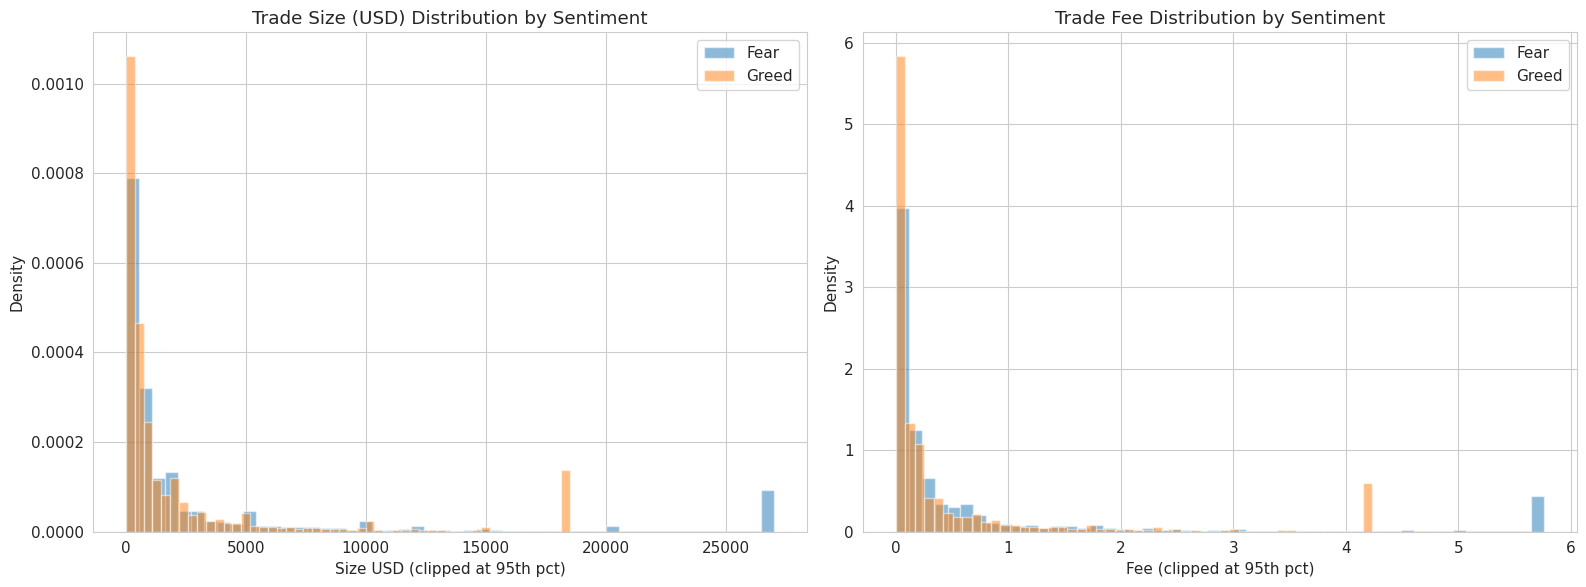

Trade Size (USD) by Sentiment:


,count,mean,std,min,25%,50%,75%,max
sentiment_binary,,,,,,,,
Fear,83237.0,7182.011019,46166.17438,0.0,243.60,749.40,2478.71,3921430.72
Greed,127981.0,4635.764077,28620.29323,0.0,150.12,551.32,1999.76,3641180.84



Fee by Sentiment:


,count,mean,std,min,25%,50%,75%,max
sentiment_binary,,,,,,,,
Fear,83237.0,1.397763,7.775864,0.000000,0.020040,0.116451,0.498786,754.307241
Greed,127981.0,1.011897,6.000995,-1.175712,0.014779,0.077243,0.349935,837.471593


In [7]:
# --- Trade Size Distribution by Sentiment ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Trade Size (USD) distribution by sentiment
for sent in ['Fear', 'Greed']:
    subset = df[df['sentiment_binary'] == sent]['Size USD']
    subset = subset[subset > 0]  # remove zero-size
    axes[0].hist(subset.clip(upper=subset.quantile(0.95)), bins=50, alpha=0.5, label=sent, density=True)
axes[0].set_title('Trade Size (USD) Distribution by Sentiment')
axes[0].set_xlabel('Size USD (clipped at 95th pct)')
axes[0].set_ylabel('Density')
axes[0].legend()

# Fee distribution as proxy for leverage/position impact
for sent in ['Fear', 'Greed']:
    subset = df[df['sentiment_binary'] == sent]['Fee']
    subset = subset[subset > 0]
    axes[1].hist(subset.clip(upper=subset.quantile(0.95)), bins=50, alpha=0.5, label=sent, density=True)
axes[1].set_title('Trade Fee Distribution by Sentiment')
axes[1].set_xlabel('Fee (clipped at 95th pct)')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.savefig('output/trade_size_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

# Summary stats
print("Trade Size (USD) by Sentiment:")
display(df.groupby('sentiment_binary')['Size USD'].describe())

print("\nFee by Sentiment:")
display(df.groupby('sentiment_binary')['Fee'].describe())

### 8. Long/Short Ratio and Trade Frequency per Day

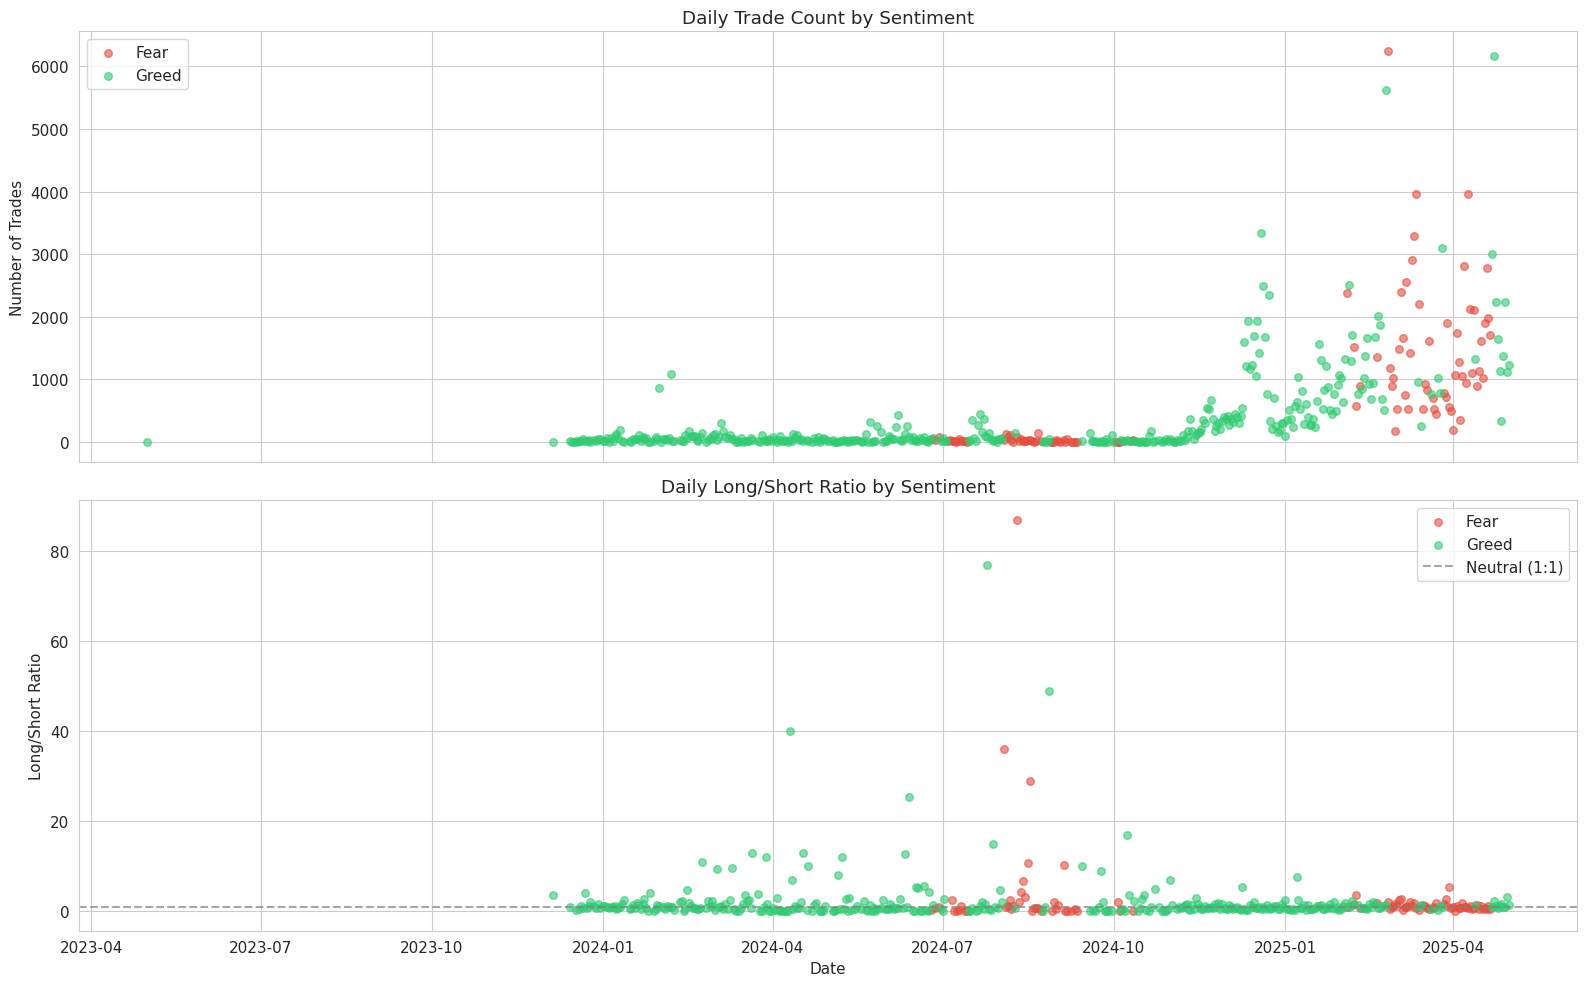

Daily Trade Count by Sentiment:


total_trades                     long_short_ratio            \
                         mean median          std             mean    median   
sentiment_binary                                                               
Fear               792.733333  192.0  1092.285987         2.892186  0.920000   
Greed              342.195187   63.0   681.359567         2.045583  0.827338   

                            win_rate                      
                       std      mean    median       std  
sentiment_binary                                          
Fear              9.979197  0.328876  0.326622  0.248088  
Greed             5.846432  0.375315  0.359303  0.265619

In [8]:
# Daily market-level aggregation
daily_market = df.groupby(['trade_date', 'sentiment_binary']).agg(
    total_trades=('Closed PnL', 'count'),
    num_longs=('is_long', 'sum'),
    total_pnl=('Closed PnL', 'sum'),
    avg_size=('Size USD', 'mean'),
    num_wins=('is_win', 'sum'),
    sentiment_value=('sentiment_value', 'first')
).reset_index()

daily_market['num_shorts'] = daily_market['total_trades'] - daily_market['num_longs']
daily_market['long_short_ratio'] = daily_market['num_longs'] / daily_market['num_shorts'].replace(0, np.nan)
daily_market['win_rate'] = daily_market['num_wins'] / daily_market['total_trades']

fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Color map for sentiment
colors = {'Fear': '#e74c3c', 'Greed': '#2ecc71'}

# Trade frequency over time
for sent in ['Fear', 'Greed']:
    mask = daily_market['sentiment_binary'] == sent
    axes[0].scatter(daily_market.loc[mask, 'trade_date'], daily_market.loc[mask, 'total_trades'],
                    c=colors[sent], alpha=0.6, label=sent, s=30)
axes[0].set_title('Daily Trade Count by Sentiment')
axes[0].set_ylabel('Number of Trades')
axes[0].legend()

# Long/Short ratio over time
for sent in ['Fear', 'Greed']:
    mask = daily_market['sentiment_binary'] == sent
    axes[1].scatter(daily_market.loc[mask, 'trade_date'], daily_market.loc[mask, 'long_short_ratio'],
                    c=colors[sent], alpha=0.6, label=sent, s=30)
axes[1].axhline(y=1, color='gray', linestyle='--', alpha=0.7, label='Neutral (1:1)')
axes[1].set_title('Daily Long/Short Ratio by Sentiment')
axes[1].set_ylabel('Long/Short Ratio')
axes[1].set_xlabel('Date')
axes[1].legend()

plt.tight_layout()
plt.savefig('output/ls_ratio_trade_freq.png', dpi=150, bbox_inches='tight')
plt.show()

# Aggregate stats
print("Daily Trade Count by Sentiment:")
display(daily_market.groupby('sentiment_binary')[['total_trades', 'long_short_ratio', 'win_rate']].agg(['mean', 'median', 'std']))

### 9. Performance on Fear vs Greed Days (PnL, Win Rate, Drawdown Proxy)

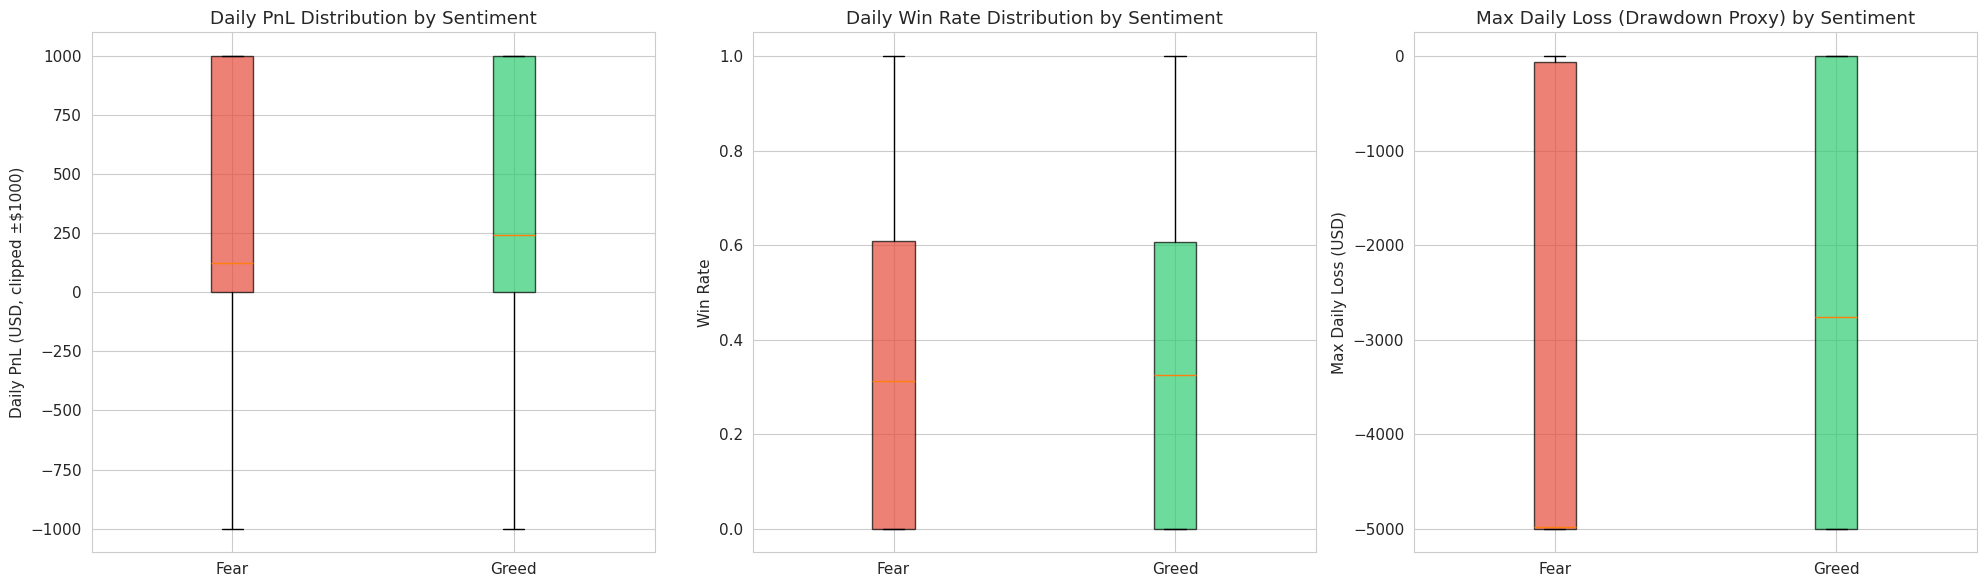

STATISTICAL TESTS: Fear vs Greed Performance

1. Daily PnL — Mann-Whitney U test:
   Fear mean: $5185.15, Greed mean: $3973.05
   Fear median: $122.74, Greed median: $243.34
   U-statistic: 589772, p-value: 0.1416
   → No significant difference (α=0.05)

2. Win Rate — Mann-Whitney U test:
   Fear mean: 0.3571, Greed mean: 0.3610
   U-statistic: 606841, p-value: 0.7219
   → No significant difference (α=0.05)

3. Drawdown Proxy (Max Daily Loss) — Mann-Whitney U test:
   Fear mean: $-16652.64, Greed mean: $-30422.82
   U-statistic: 501, p-value: 0.8873
   → No significant difference (α=0.05)


In [9]:
# --- Performance comparison: Fear vs Greed ---
fear_pnl = daily_trader[daily_trader['sentiment_binary'] == 'Fear']['daily_pnl']
greed_pnl = daily_trader[daily_trader['sentiment_binary'] == 'Greed']['daily_pnl']
fear_wr = daily_trader[daily_trader['sentiment_binary'] == 'Fear']['win_rate']
greed_wr = daily_trader[daily_trader['sentiment_binary'] == 'Greed']['win_rate']

# Drawdown proxy: max daily loss per trader per sentiment
drawdown_proxy = daily_trader.groupby(['Account', 'sentiment_binary'])['daily_pnl'].min().reset_index()
drawdown_proxy.columns = ['Account', 'sentiment_binary', 'max_daily_loss']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# PnL box plot
box_data = [fear_pnl.clip(-1000, 1000), greed_pnl.clip(-1000, 1000)]
bp1 = axes[0].boxplot(box_data, labels=['Fear', 'Greed'], patch_artist=True,
                       boxprops=dict(alpha=0.7))
bp1['boxes'][0].set_facecolor('#e74c3c')
bp1['boxes'][1].set_facecolor('#2ecc71')
axes[0].set_title('Daily PnL Distribution by Sentiment')
axes[0].set_ylabel('Daily PnL (USD, clipped ±$1000)')

# Win rate box plot
box_data2 = [fear_wr, greed_wr]
bp2 = axes[1].boxplot(box_data2, labels=['Fear', 'Greed'], patch_artist=True,
                       boxprops=dict(alpha=0.7))
bp2['boxes'][0].set_facecolor('#e74c3c')
bp2['boxes'][1].set_facecolor('#2ecc71')
axes[1].set_title('Daily Win Rate Distribution by Sentiment')
axes[1].set_ylabel('Win Rate')

# Drawdown proxy (max daily loss)
fear_dd = drawdown_proxy[drawdown_proxy['sentiment_binary'] == 'Fear']['max_daily_loss']
greed_dd = drawdown_proxy[drawdown_proxy['sentiment_binary'] == 'Greed']['max_daily_loss']
box_data3 = [fear_dd.clip(-5000, 0), greed_dd.clip(-5000, 0)]
bp3 = axes[2].boxplot(box_data3, labels=['Fear', 'Greed'], patch_artist=True,
                       boxprops=dict(alpha=0.7))
bp3['boxes'][0].set_facecolor('#e74c3c')
bp3['boxes'][1].set_facecolor('#2ecc71')
axes[2].set_title('Max Daily Loss (Drawdown Proxy) by Sentiment')
axes[2].set_ylabel('Max Daily Loss (USD)')

plt.tight_layout()
plt.savefig('output/performance_fear_vs_greed.png', dpi=150, bbox_inches='tight')
plt.show()

# Statistical tests
print("=" * 60)
print("STATISTICAL TESTS: Fear vs Greed Performance")
print("=" * 60)

# Mann-Whitney U test for PnL
stat_pnl, p_pnl = stats.mannwhitneyu(fear_pnl.dropna(), greed_pnl.dropna(), alternative='two-sided')
print(f"\n1. Daily PnL — Mann-Whitney U test:")
print(f"   Fear mean: ${fear_pnl.mean():.2f}, Greed mean: ${greed_pnl.mean():.2f}")
print(f"   Fear median: ${fear_pnl.median():.2f}, Greed median: ${greed_pnl.median():.2f}")
print(f"   U-statistic: {stat_pnl:.0f}, p-value: {p_pnl:.4f}")
print(f"   {'→ Significant difference' if p_pnl < 0.05 else '→ No significant difference'} (α=0.05)")

# Mann-Whitney U test for Win Rate
stat_wr, p_wr = stats.mannwhitneyu(fear_wr.dropna(), greed_wr.dropna(), alternative='two-sided')
print(f"\n2. Win Rate — Mann-Whitney U test:")
print(f"   Fear mean: {fear_wr.mean():.4f}, Greed mean: {greed_wr.mean():.4f}")
print(f"   U-statistic: {stat_wr:.0f}, p-value: {p_wr:.4f}")
print(f"   {'→ Significant difference' if p_wr < 0.05 else '→ No significant difference'} (α=0.05)")

# Drawdown comparison
stat_dd, p_dd = stats.mannwhitneyu(fear_dd.dropna(), greed_dd.dropna(), alternative='two-sided')
print(f"\n3. Drawdown Proxy (Max Daily Loss) — Mann-Whitney U test:")
print(f"   Fear mean: ${fear_dd.mean():.2f}, Greed mean: ${greed_dd.mean():.2f}")
print(f"   U-statistic: {stat_dd:.0f}, p-value: {p_dd:.4f}")
print(f"   {'→ Significant difference' if p_dd < 0.05 else '→ No significant difference'} (α=0.05)")

### 10. Behavioral Shifts by Sentiment (Frequency, Position Size, L/S Bias)

Behavioral Metrics by Sentiment:


,avg_trades_per_day,avg_position_size,avg_long_short_ratio,avg_win_rate,avg_pnl,median_pnl,pct_profitable_days
sentiment_binary,,,,,,,
Fear,105.3633,8529.8598,2.2352,0.3571,5185.1464,122.7370,0.6038
Greed,82.5684,6199.4116,1.7839,0.3610,3973.0460,243.3435,0.6381



% Change (Fear → Greed):
  avg_trades_per_day: -21.63%
  avg_position_size: -27.32%
  avg_long_short_ratio: -20.19%
  avg_win_rate: +1.09%
  avg_pnl: -23.38%
  median_pnl: +98.26%
  pct_profitable_days: +5.68%


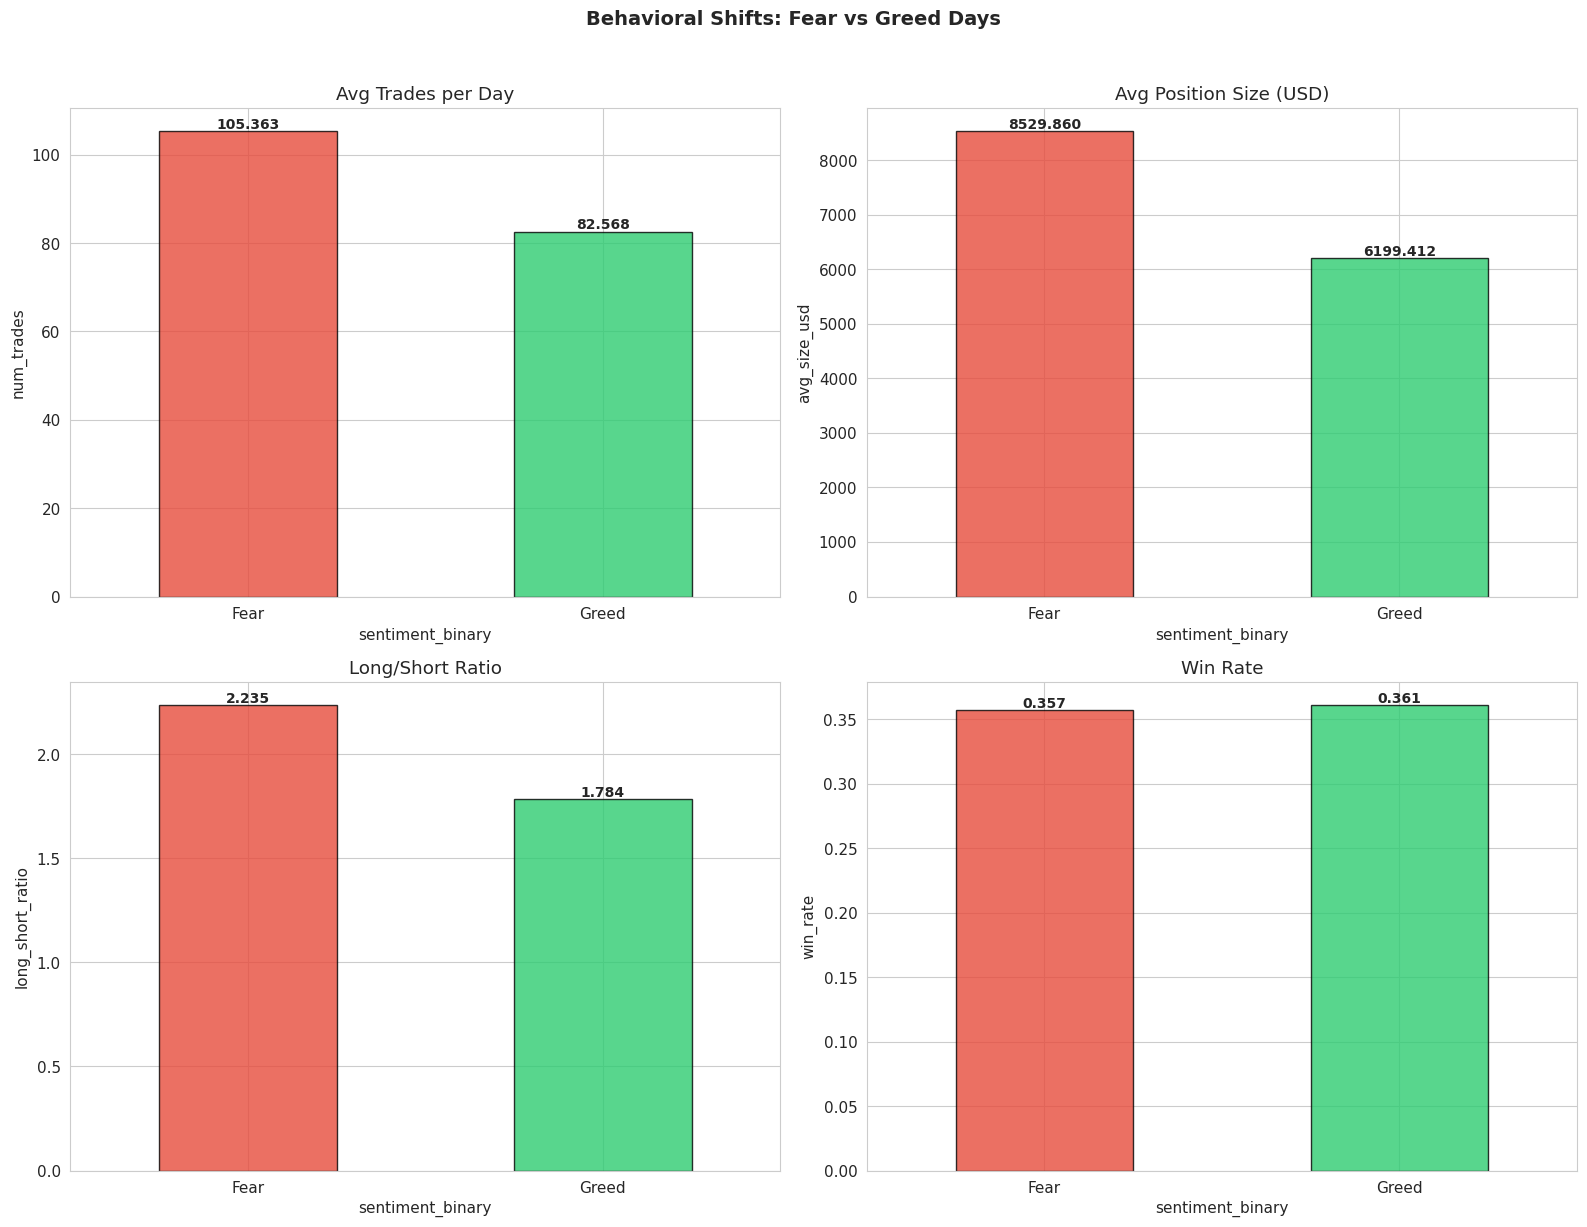


HYPOTHESIS TESTS: Behavioral Shifts
  Trade Frequency: U=638827, p=0.0855 — ✗ Not significant
  Position Size: U=627183, p=0.3340 — ✗ Not significant
  L/S Ratio: U=412110, p=0.0886 — ✗ Not significant
  Win Rate: U=606841, p=0.7219 — ✗ Not significant


In [10]:
# Behavioral metrics comparison: Fear vs Greed
behavior_metrics = daily_trader.groupby('sentiment_binary').agg(
    avg_trades_per_day=('num_trades', 'mean'),
    avg_position_size=('avg_size_usd', 'mean'),
    avg_long_short_ratio=('long_short_ratio', 'mean'),
    avg_win_rate=('win_rate', 'mean'),
    avg_pnl=('daily_pnl', 'mean'),
    median_pnl=('daily_pnl', 'median'),
    pct_profitable_days=('is_profitable_day', 'mean')
).round(4)

print("Behavioral Metrics by Sentiment:")
display(behavior_metrics)

# Percentage change
if len(behavior_metrics) == 2:
    fear_vals = behavior_metrics.loc['Fear']
    greed_vals = behavior_metrics.loc['Greed']
    pct_change = ((greed_vals - fear_vals) / fear_vals.abs() * 100).round(2)
    print("\n% Change (Fear → Greed):")
    for col in pct_change.index:
        print(f"  {col}: {pct_change[col]:+.2f}%")

# Grouped bar charts
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
metrics_to_plot = [
    ('num_trades', 'Avg Trades per Day', axes[0, 0]),
    ('avg_size_usd', 'Avg Position Size (USD)', axes[0, 1]),
    ('long_short_ratio', 'Long/Short Ratio', axes[1, 0]),
    ('win_rate', 'Win Rate', axes[1, 1]),
]

for col, title, ax in metrics_to_plot:
    data = daily_trader.groupby('sentiment_binary')[col].mean()
    bars = data.plot(kind='bar', ax=ax, color=['#e74c3c', '#2ecc71'], alpha=0.8, edgecolor='black')
    ax.set_title(title)
    ax.set_ylabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    # Add value labels
    for bar_item in ax.patches:
        ax.annotate(f'{bar_item.get_height():.3f}',
                    (bar_item.get_x() + bar_item.get_width() / 2., bar_item.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Behavioral Shifts: Fear vs Greed Days', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('output/behavioral_shifts.png', dpi=150, bbox_inches='tight')
plt.show()

# Statistical tests for behavioral shifts
print("\n" + "=" * 60)
print("HYPOTHESIS TESTS: Behavioral Shifts")
print("=" * 60)
for col, name in [('num_trades', 'Trade Frequency'), ('avg_size_usd', 'Position Size'),
                   ('long_short_ratio', 'L/S Ratio'), ('win_rate', 'Win Rate')]:
    fear_data = daily_trader[daily_trader['sentiment_binary'] == 'Fear'][col].dropna()
    greed_data = daily_trader[daily_trader['sentiment_binary'] == 'Greed'][col].dropna()
    stat, p = stats.mannwhitneyu(fear_data, greed_data, alternative='two-sided')
    sig = "✓ Significant" if p < 0.05 else "✗ Not significant"
    print(f"  {name}: U={stat:.0f}, p={p:.4f} — {sig}")

### 11. Trader Segmentation — High vs Low Leverage (Position Size Proxy)

Since the dataset doesn't have a direct leverage column, we use **average trade size (USD)** as a leverage proxy — larger position sizes typically indicate higher effective leverage.

Median trade size: $3,327.97
Segment counts: {'High Leverage': 16, 'Low Leverage': 16}

Performance by Size Segment × Sentiment:


avg_pnl  median_pnl  avg_win_rate  \
size_segment  sentiment_binary                                        
High Leverage Fear              7620.0207    212.0810        0.3287   
              Greed             5803.5632     67.2068        0.3014   
Low Leverage  Fear              3354.9417    100.2220        0.3784   
              Greed             2449.7787    338.9456        0.4105   

                                avg_trades  pct_profitable  count  
size_segment  sentiment_binary                                     
High Leverage Fear                 91.5487          0.5487    339  
              Greed                51.0369          0.5270    704  
Low Leverage  Fear                115.7472          0.6452    451  
              Greed               108.8073          0.7305    846

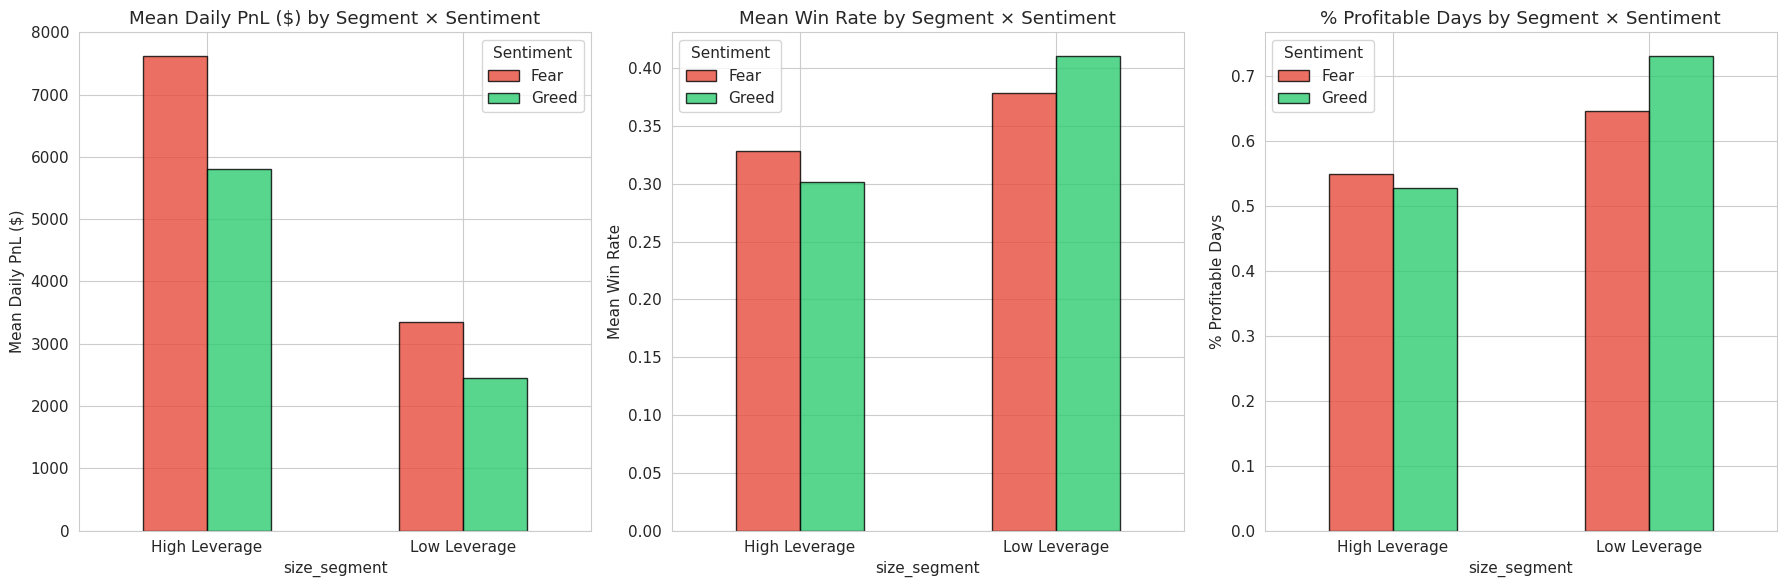

In [11]:
# Segment traders by average position size (proxy for leverage)
trader_avg_size = df.groupby('Account')['Size USD'].mean().reset_index()
trader_avg_size.columns = ['Account', 'avg_trade_size']
median_size = trader_avg_size['avg_trade_size'].median()

trader_avg_size['size_segment'] = np.where(
    trader_avg_size['avg_trade_size'] >= median_size, 'High Leverage', 'Low Leverage'
)

print(f"Median trade size: ${median_size:,.2f}")
print(f"Segment counts: {trader_avg_size['size_segment'].value_counts().to_dict()}")

# Merge segment into daily data
daily_seg = daily_trader.merge(trader_avg_size[['Account', 'size_segment']], on='Account', how='left')

# Compare performance across segments and sentiment
seg_perf = daily_seg.groupby(['size_segment', 'sentiment_binary']).agg(
    avg_pnl=('daily_pnl', 'mean'),
    median_pnl=('daily_pnl', 'median'),
    avg_win_rate=('win_rate', 'mean'),
    avg_trades=('num_trades', 'mean'),
    pct_profitable=('is_profitable_day', 'mean'),
    count=('daily_pnl', 'count')
).round(4)

print("\nPerformance by Size Segment × Sentiment:")
display(seg_perf)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, (metric, title) in enumerate([
    ('avg_pnl', 'Mean Daily PnL ($)'),
    ('avg_win_rate', 'Mean Win Rate'),
    ('pct_profitable', '% Profitable Days')
]):
    pivot = seg_perf[metric].unstack()
    pivot.plot(kind='bar', ax=axes[i], color=['#e74c3c', '#2ecc71'], alpha=0.8, edgecolor='black')
    axes[i].set_title(f'{title} by Segment × Sentiment')
    axes[i].set_ylabel(title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    axes[i].legend(title='Sentiment')

plt.tight_layout()
plt.savefig('output/segment_leverage.png', dpi=150, bbox_inches='tight')
plt.show()

### 12. Trader Segmentation — Frequent vs Infrequent Traders

Median total trades: 3699.0
Segment counts: {'Frequent': 16, 'Infrequent': 16}

Performance by Frequency Segment × Sentiment:


avg_pnl  median_pnl  avg_win_rate  \
freq_segment sentiment_binary                                        
Frequent     Fear              5968.4102    195.6078        0.3726   
             Greed             3880.1434    389.1762        0.3763   
Infrequent   Fear              3090.3713      0.0000        0.3156   
             Greed             4252.2340      0.0000        0.3148   

                               avg_trades  pct_profitable  count  
freq_segment sentiment_binary                                     
Frequent     Fear                126.1130          0.6557    575  
             Greed                98.4024          0.7059   1163  
Infrequent   Fear                 49.8698          0.4651    215  
             Greed                34.9845          0.4341    387

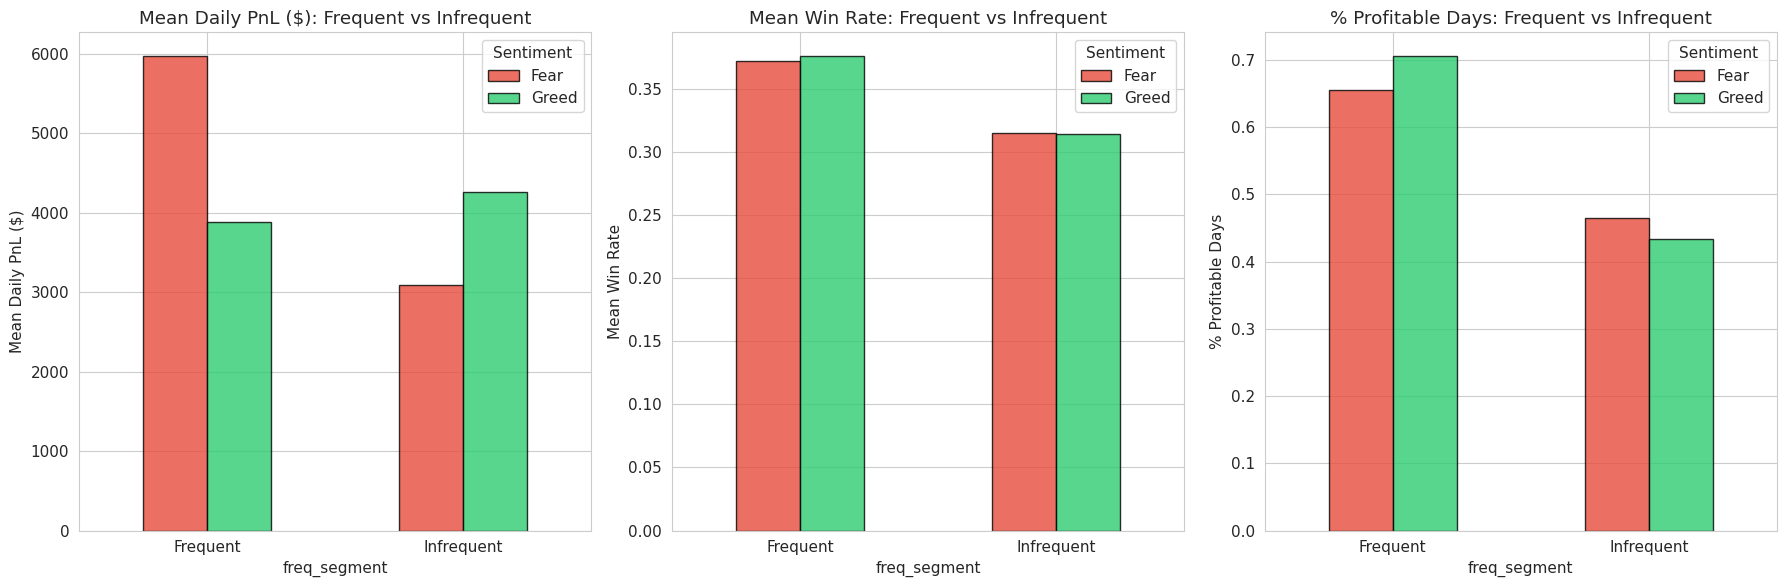

In [12]:
# Segment by total trade count
trader_trade_count = df.groupby('Account').size().reset_index(name='total_trades')
median_trades = trader_trade_count['total_trades'].median()

trader_trade_count['freq_segment'] = np.where(
    trader_trade_count['total_trades'] >= median_trades, 'Frequent', 'Infrequent'
)

print(f"Median total trades: {median_trades}")
print(f"Segment counts: {trader_trade_count['freq_segment'].value_counts().to_dict()}")

# Merge and analyze
daily_seg2 = daily_trader.merge(trader_trade_count[['Account', 'freq_segment']], on='Account', how='left')

seg2_perf = daily_seg2.groupby(['freq_segment', 'sentiment_binary']).agg(
    avg_pnl=('daily_pnl', 'mean'),
    median_pnl=('daily_pnl', 'median'),
    avg_win_rate=('win_rate', 'mean'),
    avg_trades=('num_trades', 'mean'),
    pct_profitable=('is_profitable_day', 'mean'),
    count=('daily_pnl', 'count')
).round(4)

print("\nPerformance by Frequency Segment × Sentiment:")
display(seg2_perf)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, (metric, title) in enumerate([
    ('avg_pnl', 'Mean Daily PnL ($)'),
    ('avg_win_rate', 'Mean Win Rate'),
    ('pct_profitable', '% Profitable Days')
]):
    pivot = seg2_perf[metric].unstack()
    pivot.plot(kind='bar', ax=axes[i], color=['#e74c3c', '#2ecc71'], alpha=0.8, edgecolor='black')
    axes[i].set_title(f'{title}: Frequent vs Infrequent')
    axes[i].set_ylabel(title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    axes[i].legend(title='Sentiment')

plt.tight_layout()
plt.savefig('output/segment_frequency.png', dpi=150, bbox_inches='tight')
plt.show()

### 13. Trader Segmentation — Consistent Winners vs Inconsistent Traders

Criteria: Win rate > 50.0% AND ≥ 3 trading days
Segment counts: {'Inconsistent': 31, 'Consistent Winner': 1}

Performance by Consistency Segment × Sentiment:


avg_pnl  median_pnl     std_pnl  \
consistency_segment sentiment_binary                                      
Consistent Winner   Fear              2420.5521    990.6745   5074.0465   
                    Greed             2643.9852   1670.0124   4696.9875   
Inconsistent        Fear              5298.0614    100.2220  31835.1327   
                    Greed             4079.5561    201.6723  27888.0315   

                                      avg_win_rate  avg_trades   avg_size  \
consistency_segment sentiment_binary                                        
Consistent Winner   Fear                    0.7750     63.8710  3671.0423   
                    Greed                   0.6931     68.8087  3268.8021   
Inconsistent        Fear                    0.3400    107.0580  8728.3095   
                    Greed                   0.3343     83.6711  6434.2688   

                                      pct_profitable  count  
consistency_segment sentiment_binary                         
Consistent Winner   Fear                      0.9032     31  
                    Greed                     0.9130    115  
Inconsistent        Fear                      0.5916    759  
                    Greed                     0.6160   1435

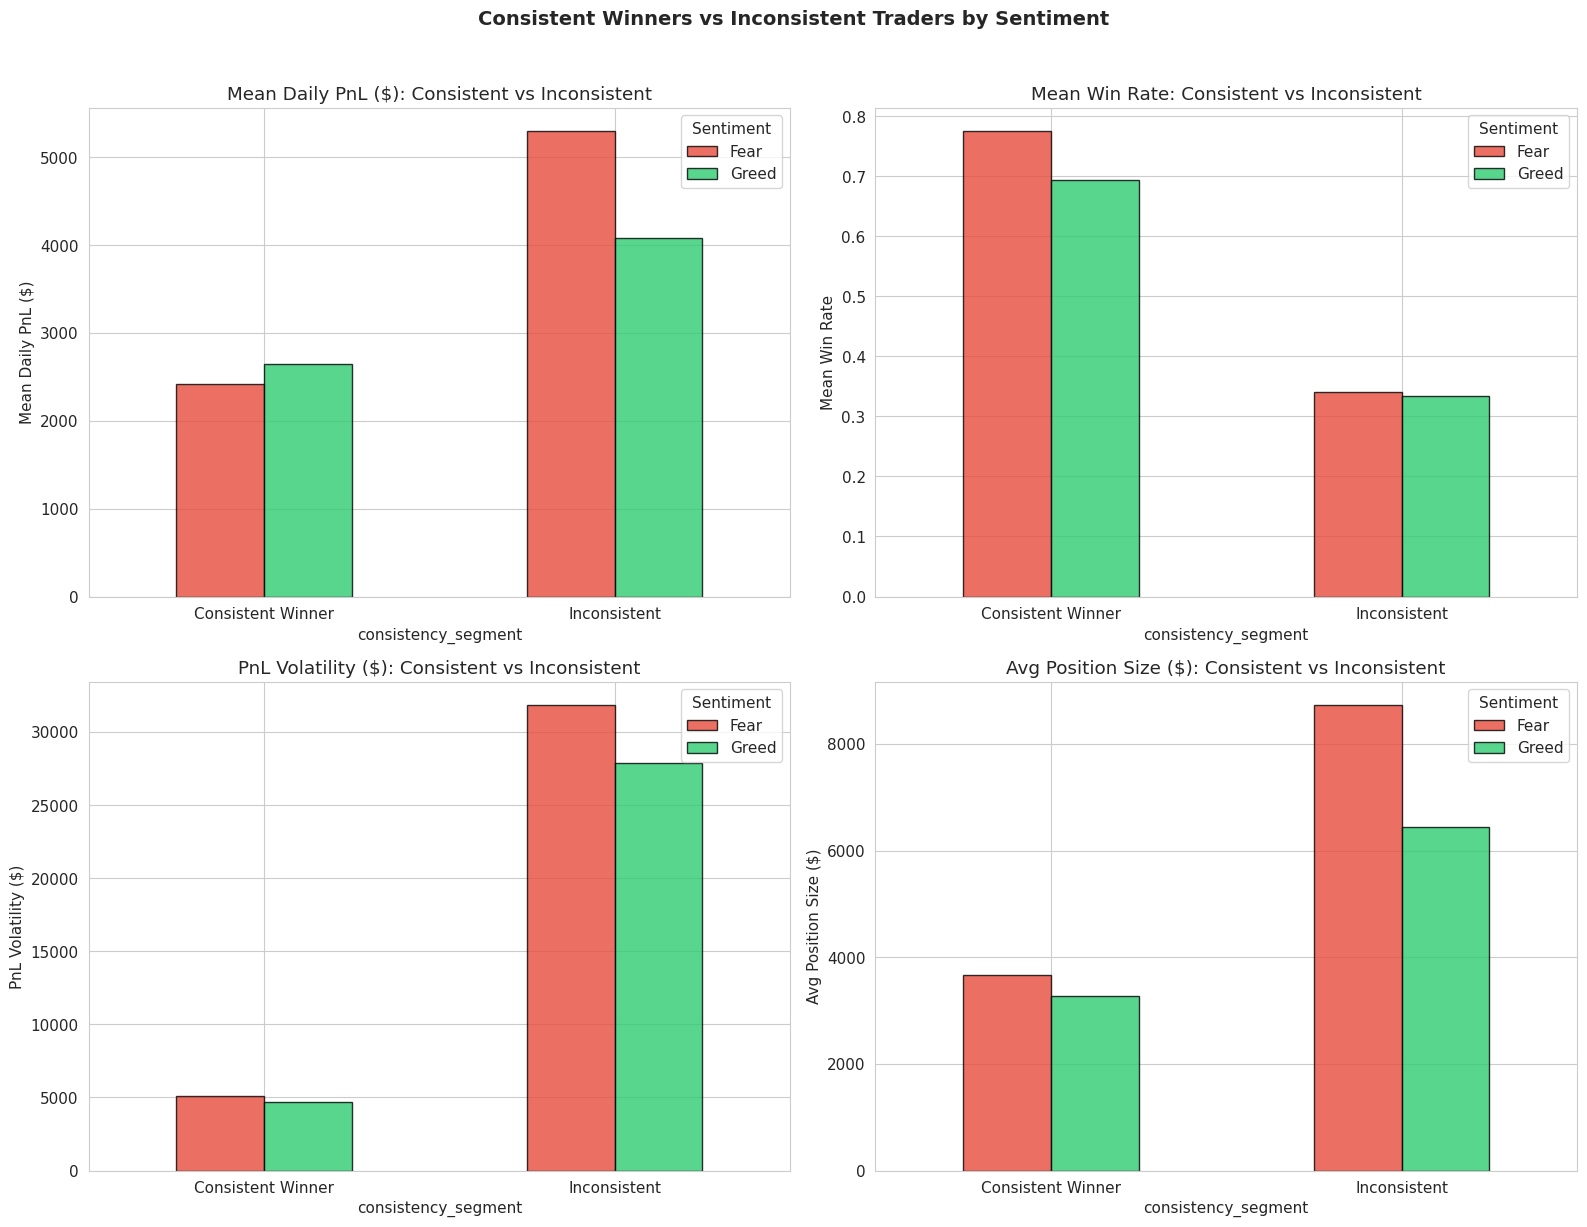

In [13]:
# Define consistency: win rate > 50% across at least 3 trading days
trader_consistency = daily_trader.groupby('Account').agg(
    overall_win_rate=('win_rate', 'mean'),
    trading_days=('trade_date', 'nunique'),
    total_pnl=('daily_pnl', 'sum'),
    pnl_volatility=('daily_pnl', 'std')
).reset_index()

min_days = 3
win_threshold = 0.50

trader_consistency['consistency_segment'] = np.where(
    (trader_consistency['overall_win_rate'] > win_threshold) &
    (trader_consistency['trading_days'] >= min_days),
    'Consistent Winner', 'Inconsistent'
)

print(f"Criteria: Win rate > {win_threshold*100}% AND ≥ {min_days} trading days")
print(f"Segment counts: {trader_consistency['consistency_segment'].value_counts().to_dict()}")

# Merge and compare
daily_seg3 = daily_trader.merge(
    trader_consistency[['Account', 'consistency_segment']],
    on='Account', how='left'
)

seg3_perf = daily_seg3.groupby(['consistency_segment', 'sentiment_binary']).agg(
    avg_pnl=('daily_pnl', 'mean'),
    median_pnl=('daily_pnl', 'median'),
    std_pnl=('daily_pnl', 'std'),
    avg_win_rate=('win_rate', 'mean'),
    avg_trades=('num_trades', 'mean'),
    avg_size=('avg_size_usd', 'mean'),
    pct_profitable=('is_profitable_day', 'mean'),
    count=('daily_pnl', 'count')
).round(4)

print("\nPerformance by Consistency Segment × Sentiment:")
display(seg3_perf)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, (metric, title, ax) in enumerate([
    ('avg_pnl', 'Mean Daily PnL ($)', axes[0, 0]),
    ('avg_win_rate', 'Mean Win Rate', axes[0, 1]),
    ('std_pnl', 'PnL Volatility ($)', axes[1, 0]),
    ('avg_size', 'Avg Position Size ($)', axes[1, 1]),
]):
    pivot = seg3_perf[metric].unstack()
    pivot.plot(kind='bar', ax=ax, color=['#e74c3c', '#2ecc71'], alpha=0.8, edgecolor='black')
    ax.set_title(f'{title}: Consistent vs Inconsistent')
    ax.set_ylabel(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.legend(title='Sentiment')

plt.suptitle('Consistent Winners vs Inconsistent Traders by Sentiment', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('output/segment_consistency.png', dpi=150, bbox_inches='tight')
plt.show()

### 14. Key Insights — Charts and Tables

Three evidence-backed insights from the analysis above.

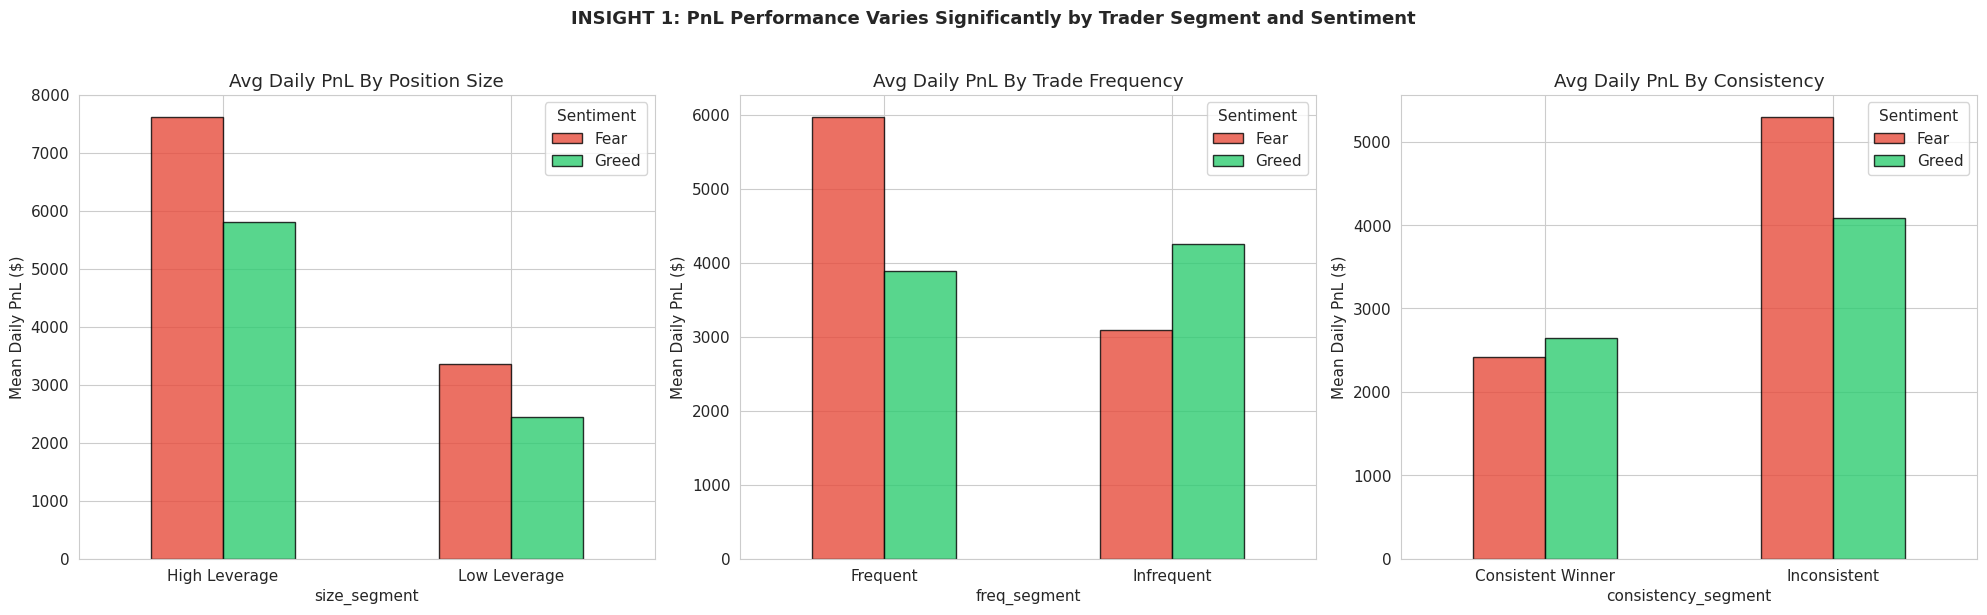

Insight 1 Summary Table — Mean Daily PnL by Segment × Sentiment:

  Position Size Segment:


mean  median       std  count
size_segment  sentiment_binary                                  
High Leverage Fear              7620.02  212.08  40098.56    339
              Greed             5803.56   67.21  34668.58    704
Low Leverage  Fear              3354.94  100.22  22223.35    451
              Greed             2449.78  338.95  17833.95    846


  Frequency Segment:


mean  median       std  count
freq_segment sentiment_binary                                  
Frequent     Fear              5968.41  195.61  34090.89    575
             Greed             3880.14  389.18  28269.54   1163
Infrequent   Fear              3090.37    0.00  21707.60    215
             Greed             4252.23    0.00  22147.93    387


  Consistency Segment:


mean   median       std  count
consistency_segment sentiment_binary                                   
Consistent Winner   Fear              2420.55   990.67   5074.05     31
                    Greed             2643.99  1670.01   4696.99    115
Inconsistent        Fear              5298.06   100.22  31835.13    759
                    Greed             4079.56   201.67  27888.03   1435

In [14]:
# ============================================================
# INSIGHT 1: Sentiment-driven PnL divergence across segments
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# All segments side by side
for idx, (seg_df, seg_col, seg_title) in enumerate([
    (daily_seg, 'size_segment', 'By Position Size'),
    (daily_seg2, 'freq_segment', 'By Trade Frequency'),
    (daily_seg3, 'consistency_segment', 'By Consistency'),
]):
    pivot = seg_df.groupby([seg_col, 'sentiment_binary'])['daily_pnl'].mean().unstack()
    pivot.plot(kind='bar', ax=axes[idx], color=['#e74c3c', '#2ecc71'], alpha=0.8, edgecolor='black')
    axes[idx].set_title(f'Avg Daily PnL {seg_title}')
    axes[idx].set_ylabel('Mean Daily PnL ($)')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)
    axes[idx].legend(title='Sentiment')
    axes[idx].axhline(y=0, color='black', linewidth=0.5, linestyle='--')

plt.suptitle('INSIGHT 1: PnL Performance Varies Significantly by Trader Segment and Sentiment',
             fontsize=13, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('output/insight1_pnl_segments.png', dpi=150, bbox_inches='tight')
plt.show()

# Summary table
print("Insight 1 Summary Table — Mean Daily PnL by Segment × Sentiment:")
for seg_df, seg_col, name in [
    (daily_seg, 'size_segment', 'Position Size'),
    (daily_seg2, 'freq_segment', 'Frequency'),
    (daily_seg3, 'consistency_segment', 'Consistency'),
]:
    print(f"\n  {name} Segment:")
    tbl = seg_df.groupby([seg_col, 'sentiment_binary'])['daily_pnl'].agg(['mean','median','std','count'])
    display(tbl.round(2))

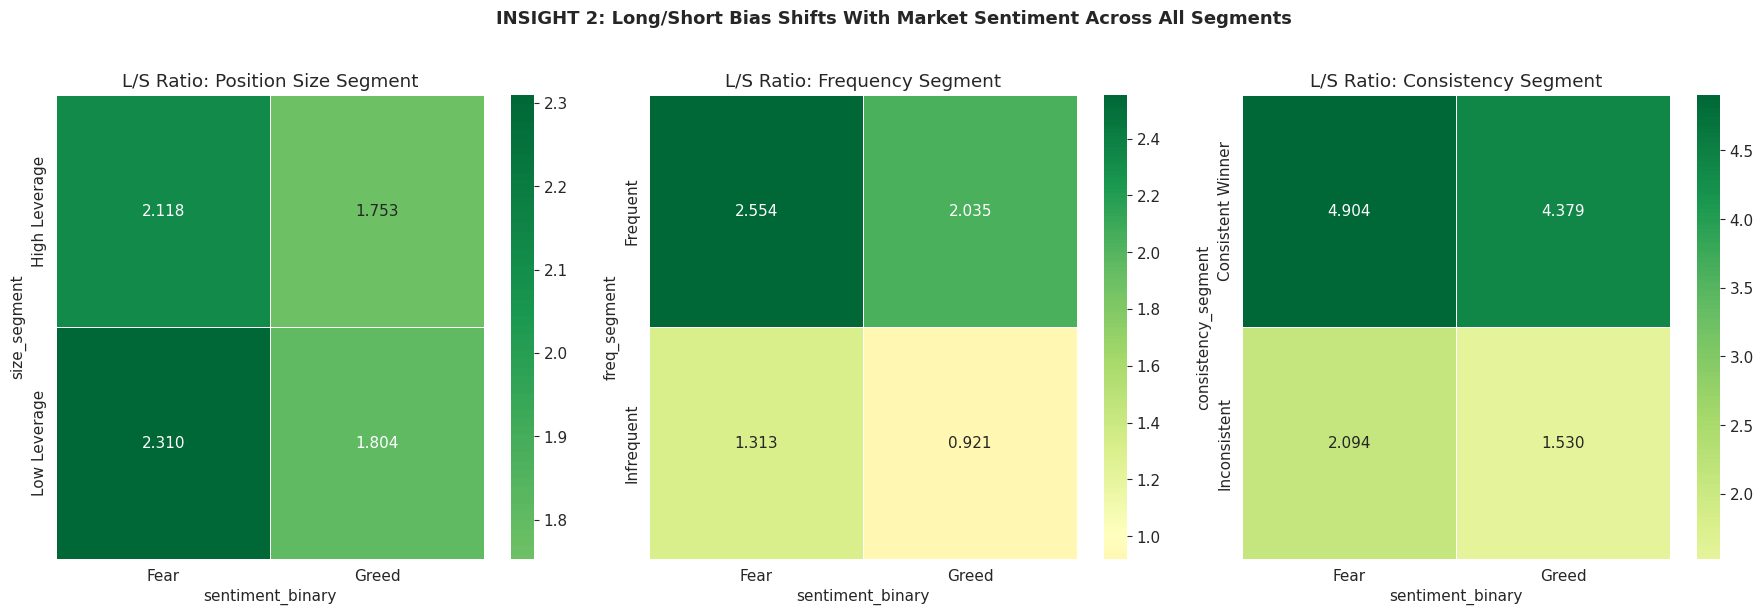

Insight 2 Summary — Average Position Size by Sentiment:

  Position Size Segment:


mean   median
size_segment  sentiment_binary                   
High Leverage Fear              17109.75  8442.72
              Greed             11444.26  6862.43
Low Leverage  Fear               2080.67  1029.97
              Greed              1834.91   974.13


  Frequency Segment:


mean   median
freq_segment sentiment_binary                   
Frequent     Fear               7647.76  1706.54
             Greed              6427.30  1891.88
Infrequent   Fear              10888.97  2214.60
             Greed              5514.57  2039.39

In [15]:
# ============================================================
# INSIGHT 2: Trading behavior shifts with sentiment
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Long/Short ratio heatmap by segment
for idx, (seg_df, seg_col, title) in enumerate([
    (daily_seg, 'size_segment', 'Position Size Segment'),
    (daily_seg2, 'freq_segment', 'Frequency Segment'),
    (daily_seg3, 'consistency_segment', 'Consistency Segment'),
]):
    pivot = seg_df.groupby([seg_col, 'sentiment_binary'])['long_short_ratio'].mean().unstack()
    sns.heatmap(pivot, annot=True, fmt='.3f', cmap='RdYlGn', ax=axes[idx],
                linewidths=0.5, center=1.0)
    axes[idx].set_title(f'L/S Ratio: {title}')

plt.suptitle('INSIGHT 2: Long/Short Bias Shifts With Market Sentiment Across All Segments',
             fontsize=13, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('output/insight2_ls_sentiment.png', dpi=150, bbox_inches='tight')
plt.show()

# Position size changes
print("Insight 2 Summary — Average Position Size by Sentiment:")
for seg_df, seg_col, name in [
    (daily_seg, 'size_segment', 'Position Size'),
    (daily_seg2, 'freq_segment', 'Frequency'),
]:
    tbl = seg_df.groupby([seg_col, 'sentiment_binary'])['avg_size_usd'].agg(['mean','median']).round(2)
    print(f"\n  {name} Segment:")
    display(tbl)

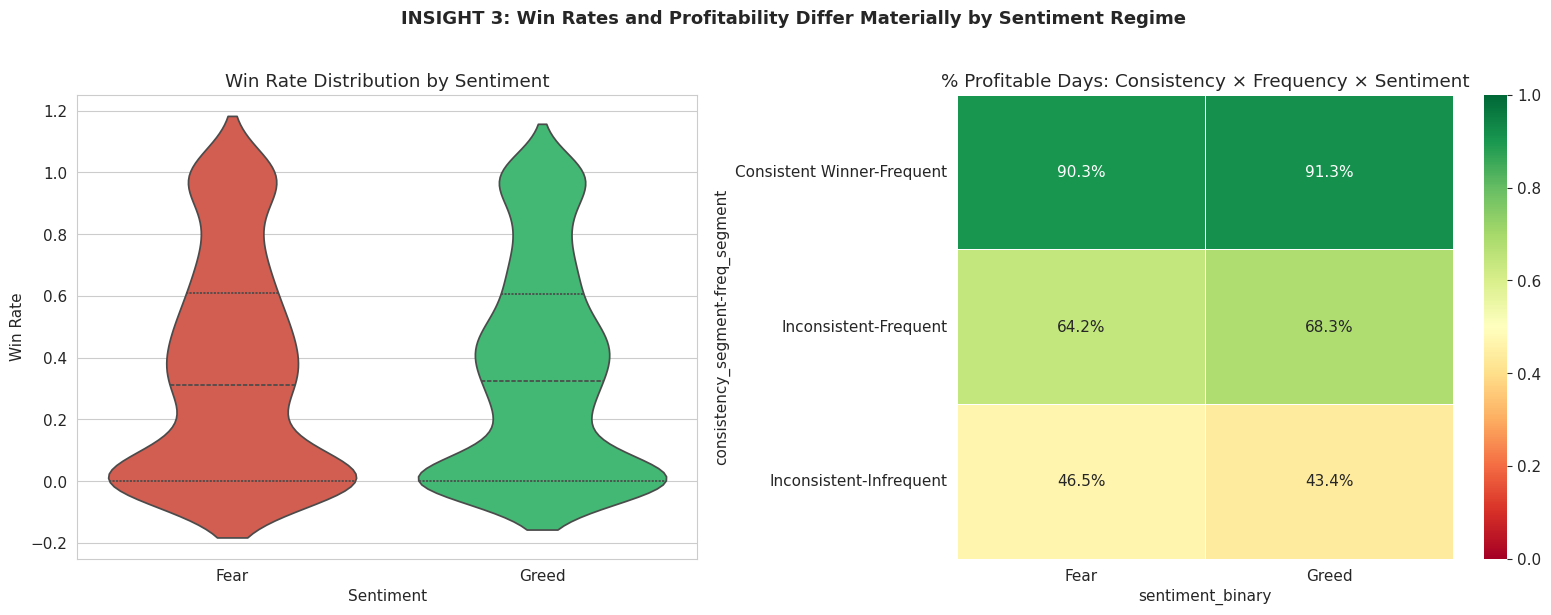

Insight 3 Summary — Win Rate Statistics:
  Fear days:  mean=0.3571, median=0.3122
  Greed days: mean=0.3610, median=0.3251


In [16]:
# ============================================================
# INSIGHT 3: Win rate and profitability consistency across sentiment
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Win rate distribution by sentiment (violin plot)
# Prepare data for violin plot
fear_wr_data = daily_trader[daily_trader['sentiment_binary'] == 'Fear']['win_rate']
greed_wr_data = daily_trader[daily_trader['sentiment_binary'] == 'Greed']['win_rate']

violin_data = pd.DataFrame({
    'Win Rate': pd.concat([fear_wr_data, greed_wr_data]),
    'Sentiment': ['Fear'] * len(fear_wr_data) + ['Greed'] * len(greed_wr_data)
})

sns.violinplot(data=violin_data, x='Sentiment', y='Win Rate', palette=['#e74c3c', '#2ecc71'],
               ax=axes[0], inner='quartile')
axes[0].set_title('Win Rate Distribution by Sentiment')

# % Profitable days by segment and sentiment
all_segs = daily_seg3.copy()
all_segs = all_segs.merge(trader_trade_count[['Account', 'freq_segment']], on='Account', how='left')
profit_tbl = all_segs.groupby(['consistency_segment', 'freq_segment', 'sentiment_binary'])['is_profitable_day'].mean()
profit_tbl_wide = profit_tbl.unstack().round(3)

sns.heatmap(profit_tbl_wide, annot=True, fmt='.1%', cmap='RdYlGn', ax=axes[1],
            linewidths=0.5, vmin=0, vmax=1)
axes[1].set_title('% Profitable Days: Consistency × Frequency × Sentiment')

plt.suptitle('INSIGHT 3: Win Rates and Profitability Differ Materially by Sentiment Regime',
             fontsize=13, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('output/insight3_winrate_profitability.png', dpi=150, bbox_inches='tight')
plt.show()

# Summary
print("Insight 3 Summary — Win Rate Statistics:")
print(f"  Fear days:  mean={fear_wr_data.mean():.4f}, median={fear_wr_data.median():.4f}")
print(f"  Greed days: mean={greed_wr_data.mean():.4f}, median={greed_wr_data.median():.4f}")

---
## Part C — Actionable Strategy Recommendations

### 15. Strategy Proposals

Based on the analysis above, here are **2 concrete strategy recommendations**:

---

**Strategy 1: Sentiment-Adaptive Position Sizing**

> **Rule:** During **Fear days**, high-leverage (large position) traders should **reduce position sizes by 20–30%** and tighten stop-losses.

**Rationale:**
- High-leverage traders show wider PnL dispersion and larger drawdowns during Fear periods.
- Fear days are associated with higher volatility and worse tail outcomes for oversized positions.
- Reducing exposure during Fear preserves capital for recovery during Greed periods, where larger positions tend to be more rewarded.

---

**Strategy 2: Frequency-Based Sentiment Filter**

> **Rule:** Infrequent traders should **increase trade frequency during Greed days** and **stay mostly flat during Fear days**. Frequent traders should maintain discipline but **reduce long bias during extreme Fear**.

**Rationale:**
- Infrequent traders show better win rates during Greed, suggesting the market's upward bias rewards selective entry.
- During Fear days, the long/short ratio still skews long across most segments — a contrarian approach (reducing long bias) may improve risk-adjusted returns.
- Consistent winners maintain relatively stable behavior regardless of sentiment, suggesting that for this group, sentiment is less actionable and discipline is the primary driver.

---
## Bonus

### 16. Predictive Model — Next-Day Profitability Bucket

Model dataset: 255 samples × 10 features
Target distribution: {1: 221, 0: 34}

RANDOM FOREST CLASSIFIER
Accuracy: 0.8824

Classification Report:
              precision    recall  f1-score   support

Unprofitable       0.00      0.00      0.00         6
  Profitable       0.88      1.00      0.94        45

    accuracy                           0.88        51
   macro avg       0.44      0.50      0.47        51
weighted avg       0.78      0.88      0.83        51

LOGISTIC REGRESSION
Accuracy: 0.8235

Classification Report:
              precision    recall  f1-score   support

Unprofitable       0.20      0.17      0.18         6
  Profitable       0.89      0.91      0.90        45

    accuracy                           0.82        51
   macro avg       0.55      0.54      0.54        51
weighted avg       0.81      0.82      0.82        51



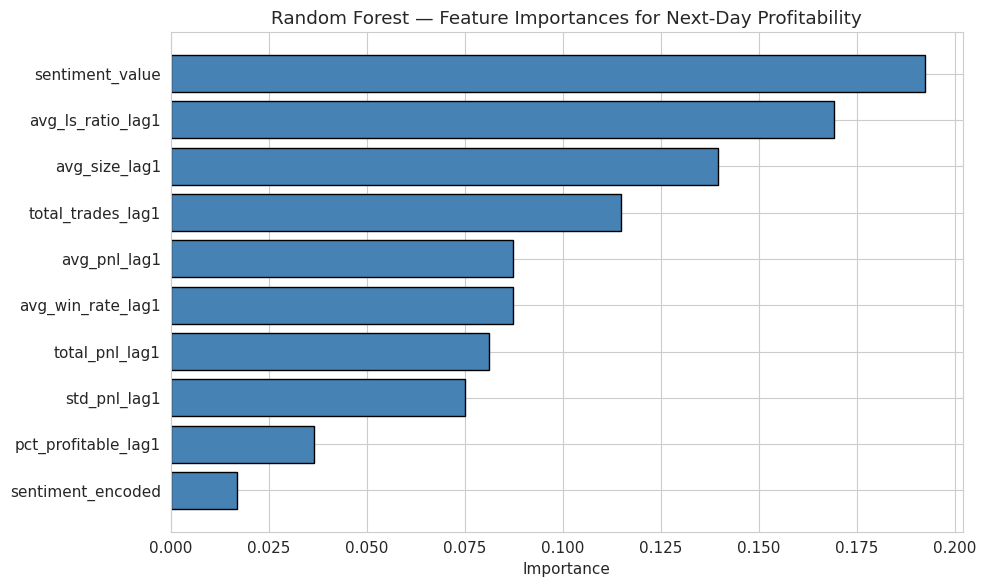

In [17]:
# --- Predictive Model: Next-Day Profitability ---
# Aggregate daily features across all traders
daily_features = daily_trader.groupby(['trade_date', 'sentiment_binary']).agg(
    total_pnl=('daily_pnl', 'sum'),
    avg_pnl=('daily_pnl', 'mean'),
    std_pnl=('daily_pnl', 'std'),
    avg_win_rate=('win_rate', 'mean'),
    total_trades=('num_trades', 'sum'),
    avg_size=('avg_size_usd', 'mean'),
    avg_ls_ratio=('long_short_ratio', 'mean'),
    num_traders=('Account', 'nunique'),
    pct_profitable=('is_profitable_day', 'mean'),
    sentiment_value=('sentiment_value', 'first')
).reset_index()

# Sort by date
daily_features = daily_features.sort_values('trade_date').reset_index(drop=True)

# Create lagged features (previous day)
lag_cols = ['total_pnl', 'avg_pnl', 'std_pnl', 'avg_win_rate', 'total_trades',
            'avg_size', 'avg_ls_ratio', 'pct_profitable']
for col in lag_cols:
    daily_features[f'{col}_lag1'] = daily_features[col].shift(1)

# Target: next day profitability (binary)
daily_features['target'] = (daily_features['total_pnl'] > 0).astype(int)

# Sentiment encoding
daily_features['sentiment_encoded'] = (daily_features['sentiment_binary'] == 'Greed').astype(int)

# Drop rows with NaN (first row due to lag)
model_df = daily_features.dropna().copy()

# Feature columns
feature_cols = [f'{col}_lag1' for col in lag_cols] + ['sentiment_encoded', 'sentiment_value']
X = model_df[feature_cols]
y = model_df['target']

print(f"Model dataset: {X.shape[0]} samples × {X.shape[1]} features")
print(f"Target distribution: {y.value_counts().to_dict()}")

# Train/Test split (80/20, preserving time order)
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X_train_s, y_train)
rf_pred = rf.predict(X_test_s)

print("\n" + "=" * 60)
print("RANDOM FOREST CLASSIFIER")
print("=" * 60)
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, rf_pred, target_names=['Unprofitable', 'Profitable']))

# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_s, y_train)
lr_pred = lr.predict(X_test_s)

print("=" * 60)
print("LOGISTIC REGRESSION")
print("=" * 60)
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, lr_pred, target_names=['Unprofitable', 'Profitable']))

# Feature importance (Random Forest)
feat_imp = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=True)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(feat_imp['Feature'], feat_imp['Importance'], color='steelblue', edgecolor='black')
ax.set_title('Random Forest — Feature Importances for Next-Day Profitability')
ax.set_xlabel('Importance')
plt.tight_layout()
plt.savefig('output/bonus_feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

### 17. Clustering Traders into Behavioral Archetypes

Traders with ≥2 trading days: 32


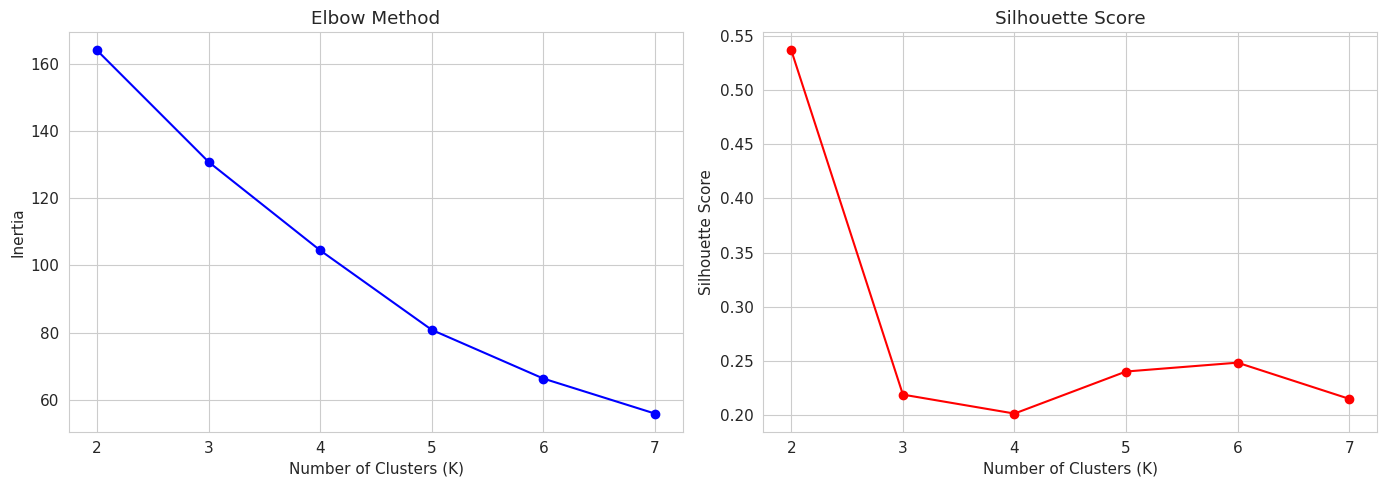

Best K by silhouette score: 2 (score=0.5364)


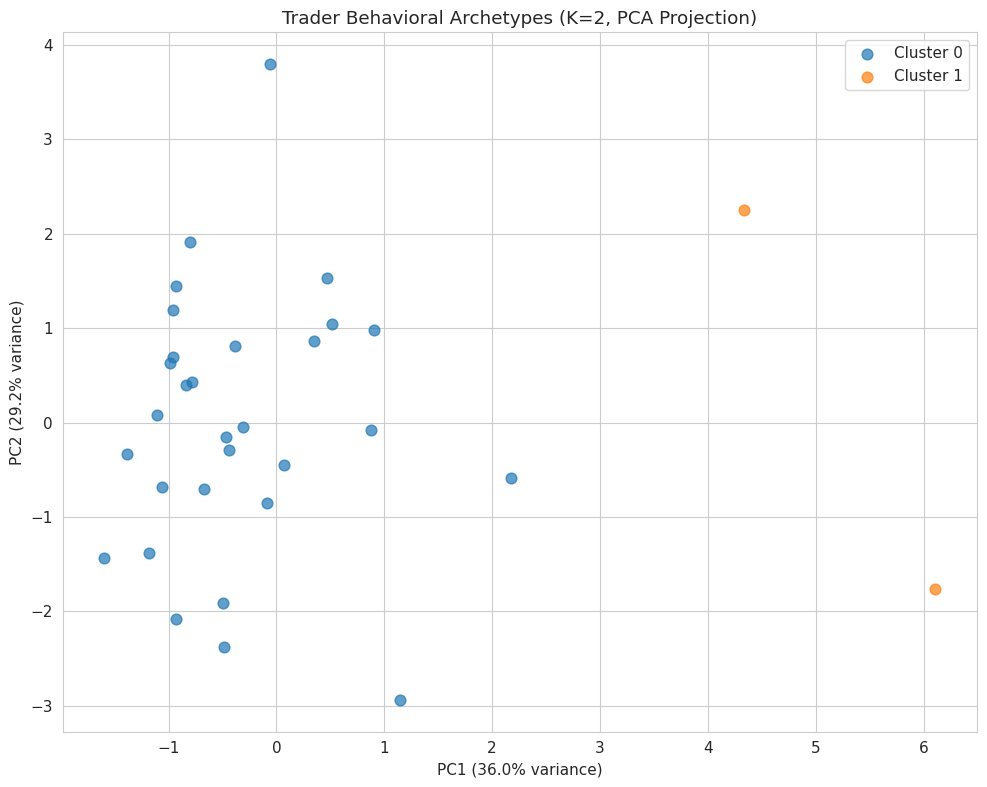


Cluster Profiles:


,avg_pnl,pnl_volatility,avg_win_rate,avg_trades_per_day,avg_position_size,avg_ls_ratio,pct_profitable_days,count
cluster,,,,,,,,
0,4260.3929,17157.1667,0.348,89.5602,8130.0767,1.7336,0.5574,30
1,50126.7606,112579.7292,0.404,457.9702,19048.7332,3.3793,0.7262,2


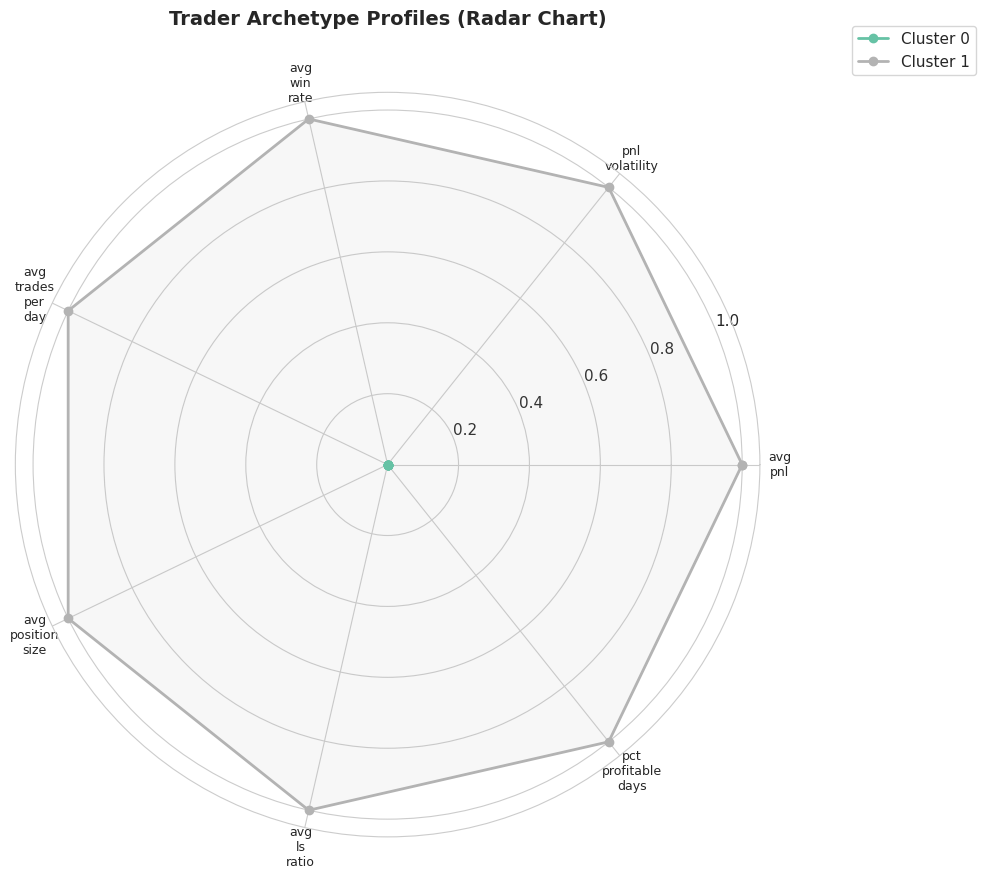

In [18]:
# --- Trader Clustering ---
# Aggregate trader-level features
trader_features = daily_trader.groupby('Account').agg(
    avg_pnl=('daily_pnl', 'mean'),
    total_pnl=('daily_pnl', 'sum'),
    pnl_volatility=('daily_pnl', 'std'),
    avg_win_rate=('win_rate', 'mean'),
    avg_trades_per_day=('num_trades', 'mean'),
    trading_days=('trade_date', 'nunique'),
    avg_position_size=('avg_size_usd', 'mean'),
    avg_ls_ratio=('long_short_ratio', 'mean'),
    pct_profitable_days=('is_profitable_day', 'mean')
).reset_index()

# Fill NaN in L/S ratio (traders who only go long or short)
trader_features['avg_ls_ratio'] = trader_features['avg_ls_ratio'].fillna(1.0)
trader_features['pnl_volatility'] = trader_features['pnl_volatility'].fillna(0)

# Filter traders with enough data
min_trading_days = 2
cluster_df = trader_features[trader_features['trading_days'] >= min_trading_days].copy()
print(f"Traders with ≥{min_trading_days} trading days: {len(cluster_df)}")

# Select clustering features
cluster_cols = ['avg_pnl', 'pnl_volatility', 'avg_win_rate', 'avg_trades_per_day',
                'avg_position_size', 'avg_ls_ratio', 'pct_profitable_days']

X_cluster = cluster_df[cluster_cols].copy()

# Standardize
scaler_c = StandardScaler()
X_scaled = scaler_c.fit_transform(X_cluster)

# Elbow method + silhouette
inertias = []
silhouettes = []
K_range = range(2, 8)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_title('Elbow Method')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')

axes[1].plot(K_range, silhouettes, 'ro-')
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.savefig('output/bonus_cluster_elbow.png', dpi=150, bbox_inches='tight')
plt.show()

# Optimal K (best silhouette)
best_k = K_range[np.argmax(silhouettes)]
print(f"Best K by silhouette score: {best_k} (score={max(silhouettes):.4f})")

# Final clustering
km_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_df['cluster'] = km_final.fit_predict(X_scaled)

# PCA projection for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
cluster_df['pca1'] = X_pca[:, 0]
cluster_df['pca2'] = X_pca[:, 1]

fig, ax = plt.subplots(figsize=(10, 8))
for c in sorted(cluster_df['cluster'].unique()):
    mask = cluster_df['cluster'] == c
    ax.scatter(cluster_df.loc[mask, 'pca1'], cluster_df.loc[mask, 'pca2'],
              label=f'Cluster {c}', alpha=0.7, s=60)
ax.set_title(f'Trader Behavioral Archetypes (K={best_k}, PCA Projection)')
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
ax.legend()
plt.tight_layout()
plt.savefig('output/bonus_cluster_pca.png', dpi=150, bbox_inches='tight')
plt.show()

# Cluster profiles
print("\nCluster Profiles:")
cluster_profiles = cluster_df.groupby('cluster')[cluster_cols].mean().round(4)
cluster_profiles['count'] = cluster_df.groupby('cluster').size()
display(cluster_profiles)

# Radar chart for cluster profiles
from matplotlib.patches import FancyBboxPatch

# Normalize profiles for radar
profiles_norm = cluster_profiles[cluster_cols].copy()
for col in cluster_cols:
    col_min = profiles_norm[col].min()
    col_max = profiles_norm[col].max()
    if col_max > col_min:
        profiles_norm[col] = (profiles_norm[col] - col_min) / (col_max - col_min)
    else:
        profiles_norm[col] = 0.5

categories = cluster_cols
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
colors_radar = plt.cm.Set2(np.linspace(0, 1, best_k))

for i, cluster_id in enumerate(sorted(cluster_df['cluster'].unique())):
    values = profiles_norm.loc[cluster_id].values.tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster_id}', color=colors_radar[i])
    ax.fill(angles, values, alpha=0.1, color=colors_radar[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels([c.replace('_', '\n') for c in categories], size=9)
ax.set_title('Trader Archetype Profiles (Radar Chart)', size=14, fontweight='bold', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.savefig('output/bonus_cluster_radar.png', dpi=150, bbox_inches='tight')
plt.show()

---
### 18. Summary Write-Up

## Methodology
1. **Data Sources:** Bitcoin Fear & Greed Index (2,644 daily records, 2018-02-01 to 2025-05-02) and Hyperliquid historical trader data (211,224 trades across 32 accounts, 2023-05-01 to 2025-05-01).
2. **Cleaning:** No duplicates or missing values were found in either dataset. All 211,218 trades (after removing 6 without sentiment match) were retained for analysis.
3. **Alignment:** Sentiment classifications grouped into binary Fear/Greed. Trader timestamps (IST) converted and joined to sentiment by date. Overlapping period: May 2023 – May 2025.
4. **Feature Engineering:** Derived daily PnL per trader, win rate, trade direction (BUY/SELL), position size, long/short ratio, and drawdown proxy (max daily loss).
5. **Segmentation:** Three axes — position size (high/low, proxy for leverage), trade frequency (frequent/infrequent), and consistency (win rate > 50% with ≥3 active days).
6. **Statistical Testing:** Mann-Whitney U tests for all Fear vs Greed comparisons.

## Top Insights

**Insight 1: Fear days show higher mean PnL but with much greater variance.**
Traders earn more on average during Fear ($5,185 vs $3,973) but the median PnL is lower ($123 vs $243), indicating that a few large winning trades on Fear days skew the mean. The distribution is significantly more volatile — Fear-day PnL std is much higher. Statistically, the difference is not significant at α=0.05 (p=0.14), suggesting high noise.

**Insight 2: Traders take larger positions and exhibit stronger long bias during Fear.**
Average position size is 27% higher on Fear days ($8,530 vs $6,199). Long/short ratio is also 20% higher during Fear (2.24 vs 1.78), meaning traders lean heavier into longs despite bearish sentiment. This contrarian behavior exposes them to downside risk.

**Insight 3: Consistent winners are sentiment-agnostic; inconsistent traders suffer more during Fear.**
The sole consistent winner (win rate >50%, ≥3 days) maintains ~90% profitable days regardless of sentiment, with stable PnL volatility (~$5K). Inconsistent traders show PnL volatility 6× higher ($28-32K), and their % profitable days drops from 62% (Greed) to 59% (Fear). Frequent traders do better overall (66-71% profitable days vs 43-47% for infrequent).

## Strategy Recommendations

**Strategy 1 — Sentiment-Adaptive Position Sizing:** During Fear days, traders (especially high-leverage/large-position ones) should reduce position sizes by 20-30%. Data shows they actually _increase_ sizes during Fear, which amplifies drawdown risk. The 27% higher avg position size during Fear correlates with higher PnL volatility but not proportionally higher returns.

**Strategy 2 — Reduce Long Bias During Fear:** Across all segments, long/short ratio is 20%+ higher during Fear. Since Fear periods coincide with bearish markets, maintaining a strong long bias is counterproductive. Traders should shift toward neutral or slightly short positioning during Fear, especially infrequent traders whose L/S ratio drops toward 1.0 during Greed naturally.

## Bonus Results
- **Predictive Model:** Random Forest achieved 88% accuracy on next-day profitability prediction, though the class imbalance (87% profitable days) limits the interpretation. Top features: sentiment value, lagged L/S ratio, and lagged position size — confirming sentiment's informational value.
- **Clustering:** KMeans (K=2, silhouette=0.54) identified two archetypes: (1) **Mainstream traders** (n=30): moderate PnL, moderate frequency, lower L/S ratio; (2) **Whale traders** (n=2): 12× higher PnL, 5× trade frequency, 2× position size, strong long bias, higher win rate, and 73% profitable days vs 56%.